# Tanzania Water Wells

## Context

## Business Problem

- Stakeholder: Tanzanian Ministry of Water 

- True business problem: Predict the functionality of wells by reducing false negatives and false positives. By doing so we are able to reduce unnecessary labor & costs. 

- Deliverables: Inference or Prediction?
    - Prediction
- Context: 
    - False negative: Well functionality prediction says it is actully functional when it is not functional.
        - Outcome: 
    - False positive: Well functionality prediction says it is not functional when it is functional.
        - Outcome:
    - We would prefer reducing **false positives** over false negatives

## Evalutation Metric

- Which metric would make sense to primarily use as we evaluate our models?
    - Accuracy - balances the two kinds of errors (but is impractical with imbalanced targets)
    - **Precision** - helps reduce false positives
    - **Recall** - helps reduce false negatives
    - F1-Score - balances recall & precision (and is beter than accuracy with imbalaced targets)
    - ROC-AUC - helps focus on better probability outputs (makes sure our predicted probabilities are better)
    
We will primarily be focusing on recall 

## Data Understanding 

### Terminology

**Define important variables and what they are**
- Functional: 
- Not functional:
- Needs repair:

### Imports 

In [212]:

import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np
import pandas as pd
import os
from datetime import date
from time import strftime
from sklearn.preprocessing import LabelEncoder,  MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn import ensemble
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve, recall_score
from sklearn.model_selection import train_test_split, cross_val_predict
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Reading data

In [214]:
!ls ../../data/

tanzania_features.csv tanzania_target.csv


In [215]:
features = pd.read_csv('../../data/tanzania_features.csv')
features

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,...,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
59396,27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,...,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
59397,37057,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0,...,monthly,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
59398,31282,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,...,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump


In [216]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [217]:
# drop extraction_type - done
features['extraction_type'].value_counts() 

gravity                      26780
nira/tanira                   8154
other                         6430
submersible                   4764
swn 80                        3670
mono                          2865
india mark ii                 2400
afridev                       1770
ksb                           1415
other - rope pump              451
other - swn 81                 229
windmill                       117
india mark iii                  98
cemo                            90
other - play pump               85
walimi                          48
climax                          32
other - mkulima/shinyanga        2
Name: extraction_type, dtype: int64

In [218]:
# drop extraction_type_group - done
features['extraction_type_group'].value_counts() 

gravity            26780
nira/tanira         8154
other               6430
submersible         6179
swn 80              3670
mono                2865
india mark ii       2400
afridev             1770
rope pump            451
other handpump       364
other motorpump      122
wind-powered         117
india mark iii        98
Name: extraction_type_group, dtype: int64

In [219]:
features['extraction_type_class'].value_counts() 

gravity         26780
handpump        16456
other            6430
submersible      6179
motorpump        2987
rope pump         451
wind-powered      117
Name: extraction_type_class, dtype: int64

In [220]:
features.management.value_counts()

vwc                 40507
wug                  6515
water board          2933
wua                  2535
private operator     1971
parastatal           1768
water authority       904
other                 844
company               685
unknown               561
other - school         99
trust                  78
Name: management, dtype: int64

In [221]:
features.scheme_management.value_counts()

VWC                 36793
WUG                  5206
Water authority      3153
WUA                  2883
Water Board          2748
Parastatal           1680
Private operator     1063
Company              1061
Other                 766
SWC                    97
Trust                  72
None                    1
Name: scheme_management, dtype: int64

In [222]:
features.scheme_name.dropna()

0                                        Roman
2                  Nyumba ya mungu pipe scheme
5                                    Zingibali
13                                  BL Bondeni
14                                        None
                         ...                  
59382    Kirua kahe gravity water supply trust
59387                                        M
59391                                Hingilili
59395                   Losaa Kia water supply
59396              Ikondo electrical water sch
Name: scheme_name, Length: 31234, dtype: object

In [223]:
features['longitude']

0        34.938093
1        34.698766
2        37.460664
3        38.486161
4        31.130847
           ...    
59395    37.169807
59396    35.249991
59397    34.017087
59398    35.861315
59399    38.104048
Name: longitude, Length: 59400, dtype: float64

In [224]:
# dropping 0s in long and lat 
features['longitude'].value_counts() 

0.000000     1812
37.540901       2
33.010510       2
39.093484       2
32.972719       2
             ... 
37.579803       1
33.196490       1
34.017119       1
33.788326       1
30.163579       1
Name: longitude, Length: 57516, dtype: int64

In [225]:
features['latitude'].value_counts() 

-2.000000e-08    1812
-6.985842e+00       2
-3.797579e+00       2
-6.981884e+00       2
-7.104625e+00       2
                 ... 
-5.726001e+00       1
-9.646831e+00       1
-8.124530e+00       1
-2.535985e+00       1
-2.598965e+00       1
Name: latitude, Length: 57517, dtype: int64

In [226]:
# drop waterpoint_type- done 
features['waterpoint_type'].value_counts() 

communal standpipe             28522
hand pump                      17488
other                           6380
communal standpipe multiple     6103
improved spring                  784
cattle trough                    116
dam                                7
Name: waterpoint_type, dtype: int64

In [227]:
features['waterpoint_type_group'].value_counts() 

communal standpipe    34625
hand pump             17488
other                  6380
improved spring         784
cattle trough           116
dam                       7
Name: waterpoint_type_group, dtype: int64

In [228]:
new_df = features.merge(target, on = 'id')

In [229]:
# drop source_class - done 

- Drop 0s in long and lat
- drop colums : payment type, scheme name, management group, 
- drop maybe funder

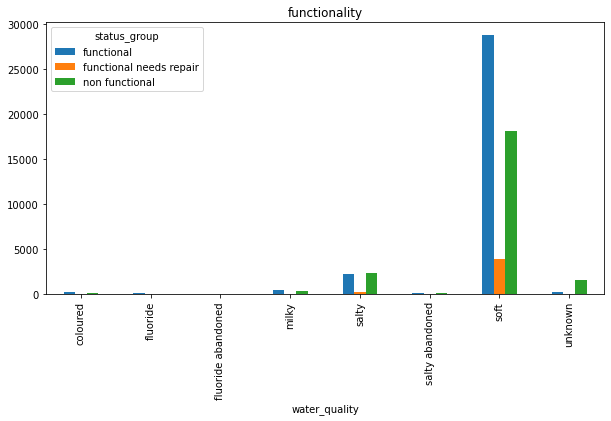

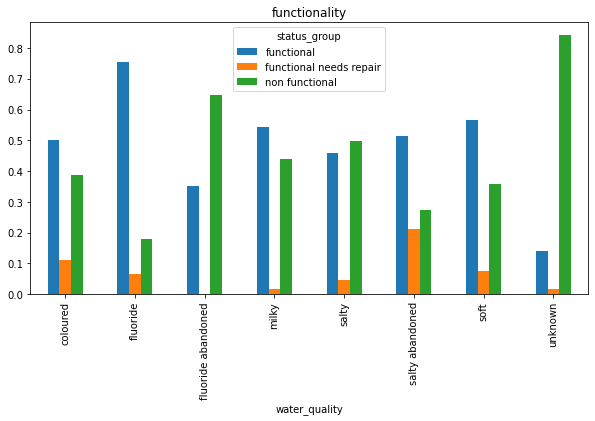

In [230]:
mplines = new_df.groupby('water_quality')['status_group'].value_counts(normalize=False).unstack().plot(kind='bar', figsize=(10,5))
mplines.set_title("functionality")
plt.show()
mplines_pct = new_df.groupby('water_quality')['status_group'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(10,5))
mplines_pct.set_title("functionality")
plt.show()

In [231]:
target = pd.read_csv('../../data/tanzania_target.csv')
target

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional
...,...,...
59395,60739,functional
59396,27263,functional
59397,37057,functional
59398,31282,functional


In [232]:
target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            59400 non-null  int64 
 1   status_group  59400 non-null  object
dtypes: int64(1), object(1)
memory usage: 928.2+ KB


In [233]:
target.describe()

,id
count,59400.000000
mean,37115.131768
std,21453.128371
min,0.000000
25%,18519.750000
50%,37061.500000
75%,55656.500000
max,74247.000000


In [234]:
features

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,...,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
59396,27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,...,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
59397,37057,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0,...,monthly,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
59398,31282,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,...,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump


In [276]:
# dropping columns
clean_df = new_df.drop(columns=['waterpoint_type', 'scheme_name',
        'num_private', 'extraction_type', 'extraction_type_group',
        'region_code','lga','ward', 'recorded_by', 'public_meeting',
        'scheme_management','source_class', 'subvillage','quantity_group','management',
        'source_type','quality_group','water_quality'])

In [277]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   gps_height             59400 non-null  int64  
 4   longitude              59400 non-null  float64
 5   latitude               59400 non-null  float64
 6   wpt_name               59400 non-null  object 
 7   basin                  59400 non-null  object 
 8   region                 59400 non-null  object 
 9   district_code          59400 non-null  int64  
 10  population             59400 non-null  int64  
 11  permit                 56344 non-null  object 
 12  construction_year      59400 non-null  int64  
 13  extraction_type_class  59400 non-null  object 
 14  management_group       59400 non-null  object 
 15  pa

In [249]:
clean_df['date_recorded'].sort_values(ascending = False)

45026    2013-12-03
38775    2013-12-03
13245    2013-12-03
36179    2013-12-03
36137    2013-12-03
            ...    
33942    2004-03-01
23373    2004-03-01
42343    2004-03-01
27501    2004-01-07
2601     2002-10-14
Name: date_recorded, Length: 59400, dtype: object

In [250]:
clean_df['longitude'].value_counts()

0.000000     1812
37.540901       2
33.010510       2
39.093484       2
32.972719       2
             ... 
37.579803       1
33.196490       1
34.017119       1
33.788326       1
30.163579       1
Name: longitude, Length: 57516, dtype: int64

In [251]:
clean_df['latitude'].value_counts()

-2.000000e-08    1812
-6.985842e+00       2
-3.797579e+00       2
-6.981884e+00       2
-7.104625e+00       2
                 ... 
-5.726001e+00       1
-9.646831e+00       1
-8.124530e+00       1
-2.535985e+00       1
-2.598965e+00       1
Name: latitude, Length: 57517, dtype: int64

In [252]:
#removing 0s in longitude
clean_df1 = clean_df[clean_df['longitude']!=0]

In [253]:
clean_df1['longitude'].value_counts()

33.090347    2
32.982698    2
37.297680    2
33.010510    2
39.093484    2
            ..
37.579803    1
33.196490    1
34.017119    1
33.788326    1
35.005922    1
Name: longitude, Length: 57515, dtype: int64

In [254]:
#removing 0s in latitude
clean_df2 = clean_df[clean_df['latitude']!=-2.000000e-08]

In [255]:
clean_df2['latitude'].value_counts()

-2.496459    2
-6.964258    2
-6.981884    2
-7.175174    2
-7.104625    2
            ..
-5.726001    1
-9.646831    1
-8.124530    1
-2.535985    1
-2.598965    1
Name: latitude, Length: 57516, dtype: int64

In [256]:
clean_df2

,id,amount_tsh,date_recorded,gps_height,longitude,latitude,wpt_name,basin,region,population,...,construction_year,extraction_type_class,management_group,payment_type,water_quality,quality_group,quantity,source,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,1390,34.938093,-9.856322,none,Lake Nyasa,Iringa,109,...,1999,gravity,user-group,annually,soft,good,enough,spring,communal standpipe,functional
1,8776,0.0,2013-03-06,1399,34.698766,-2.147466,Zahanati,Lake Victoria,Mara,280,...,2010,gravity,user-group,never pay,soft,good,insufficient,rainwater harvesting,communal standpipe,functional
2,34310,25.0,2013-02-25,686,37.460664,-3.821329,Kwa Mahundi,Pangani,Manyara,250,...,2009,gravity,user-group,per bucket,soft,good,enough,dam,communal standpipe,functional
3,67743,0.0,2013-01-28,263,38.486161,-11.155298,Zahanati Ya Nanyumbu,Ruvuma / Southern Coast,Mtwara,58,...,1986,submersible,user-group,never pay,soft,good,dry,machine dbh,communal standpipe,non functional
4,19728,0.0,2011-07-13,0,31.130847,-1.825359,Shuleni,Lake Victoria,Kagera,0,...,0,gravity,other,never pay,soft,good,seasonal,rainwater harvesting,communal standpipe,functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,2013-05-03,1210,37.169807,-3.253847,Area Three Namba 27,Pangani,Kilimanjaro,125,...,1999,gravity,user-group,per bucket,soft,good,enough,spring,communal standpipe,functional
59396,27263,4700.0,2011-05-07,1212,35.249991,-9.070629,Kwa Yahona Kuvala,Rufiji,Iringa,56,...,1996,gravity,user-group,annually,soft,good,enough,river,communal standpipe,functional
59397,37057,0.0,2011-04-11,0,34.017087,-8.750434,Mashine,Rufiji,Mbeya,0,...,0,handpump,user-group,monthly,fluoride,fluoride,enough,machine dbh,hand pump,functional
59398,31282,0.0,2011-03-08,0,35.861315,-6.378573,Mshoro,Rufiji,Dodoma,0,...,0,handpump,user-group,never pay,soft,good,insufficient,shallow well,hand pump,functional


In [258]:
clean_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57588 entries, 0 to 59399
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     57588 non-null  int64  
 1   amount_tsh             57588 non-null  float64
 2   date_recorded          57588 non-null  object 
 3   gps_height             57588 non-null  int64  
 4   longitude              57588 non-null  float64
 5   latitude               57588 non-null  float64
 6   wpt_name               57588 non-null  object 
 7   basin                  57588 non-null  object 
 8   region                 57588 non-null  object 
 9   population             57588 non-null  int64  
 10  permit                 54532 non-null  object 
 11  construction_year      57588 non-null  int64  
 12  extraction_type_class  57588 non-null  object 
 13  management_group       57588 non-null  object 
 14  payment_type           57588 non-null  object 
 15  wa

In [264]:
#removing 0s in construction_year
clean_df3 = clean_df[clean_df['construction_year']!=0]

In [268]:
clean_df3['construction_year'].value_counts()

2010    2645
2008    2613
2009    2533
2000    2091
2007    1587
2006    1471
2003    1286
2011    1256
2004    1123
2012    1084
2002    1075
1978    1037
1995    1014
2005    1011
1999     979
1998     966
1990     954
1985     945
1996     811
1980     811
1984     779
1982     744
1994     738
1972     708
1974     676
1997     644
1992     640
1993     608
2001     540
1988     521
1983     488
1975     437
1986     434
1976     414
1970     411
1991     324
1989     316
1987     302
1981     238
1977     202
1979     192
1973     184
2013     176
1971     145
1960     102
1967      88
1963      85
1968      77
1969      59
1964      40
1962      30
1961      21
1965      19
1966      17
Name: construction_year, dtype: int64

In [ ]:
# needs repair / one hot encode / dummies


In [272]:
# train test split 

y = model_df('status_group_non functional')
X= model_df.drop(columns=['status_group_non functional', 'status_group_functional needs repair', 
                          'status_group_functional','management_group_unknown','management_group_user-group'])

NameError: name 'model_df' is not defined

In [269]:
X_tr, X_test, y_tr, y_test = train_test_split(X, y, test_size=.15, random_state=2022, stratify=y)

NameError: name 'X' is not defined

In [270]:
X_train, X_val, y_train, y_val = train_test_split(X_tr, y_tr, test_size=.15, random_state=2022, stratify=y_tr)

NameError: name 'X_tr' is not defined

In [ ]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.bar(budget_months['month'],budget_months['count'], color=color, alpha=.5)
ax1.set_title("Number of Movies per Month ")
ax1.set_xlabel("Month")
ax1.set_ylabel("Number of Movies", color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.plot(budget_months['month'],budget_months['mean'], color=color)
ax2.set_ylabel("Average Total Gross Earnings", color=color)
 # we already handled the x-label with ax1
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim([0,250])
fig.tight_layout()  # otherwise the right y-label is slightly clipped
# plt.show()

### EDA Observations

Initial Findings 
- 
- 
- 

Ideas for future engineering 
- 
- 

## Data Processing 

Necessary preprocessing steps 
- 
-
-

In [279]:
sm = SMOTE(random_state=2021)

ERROR! Session/line number was not unique in database. History logging moved to new session 263


In [ ]:
X_train_sc=scaler.transform(X_train)

In [ ]:

X_train_res, y_train_res = sm.fit_resample(X_train_sc, y_train)

## Initial Modeling 

### Model-less Baseline 

Evaluate:

### Model 1: 

Evaluate:

### Model 2: 

Evaluate:

### Model 3:

Evaluate: 

## Model Choice 

- What initial model currently best describes our data?

- What model do we think would be the best fit for our business problem/data?

- Do we have any constraints? As in, do we need to have a simpler or more interpretable model for any reason?


### Iterate

** After choosing our best simple model, we can explore better hyperparameters or a more complex version to improve our predictions

Next steps: 
- Grid search?
- Ensemble methods?

## Exploratory Data Analysis 

1.

2.

3.


## Conclusions / Recommendations 

1.

2.

3.


## Next Steps 

1.

2.